In [172]:
import pandas as pd
import numpy as np 
df = pd.read_csv('spam.csv')
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [173]:
df = df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1)

In [174]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])  # 1 for Spam and 0 for Not Spam

In [176]:
df.head(4)   

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [177]:
df.shape

(5572, 2)

In [178]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [179]:
df.duplicated().sum()

403

In [180]:
df.drop_duplicates(keep='first',inplace=True)

In [181]:
df.shape

(5169, 2)

# EDA

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x12f875a1e40>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Not Spam'),
  Text(1.1067270163085225, -0.4638483711007676, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.6455907595133047, -0.2705782164754477, '12.63')])

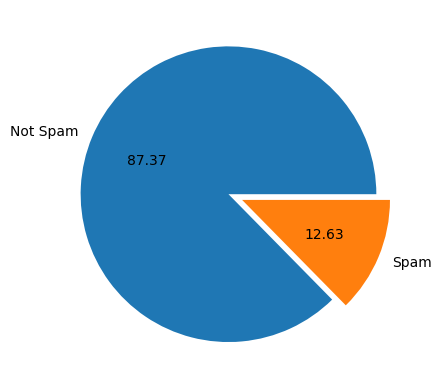

In [184]:
plt.pie(df['target'].value_counts(),labels=['Not Spam', 'Spam'], autopct="%0.2f",explode=[0,0.1])

In [185]:
import nltk

In [186]:
df['length'] = df['text'].apply(len)

In [187]:
df.head(2)

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [188]:
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [189]:
df.head(3)

,target,text,length,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [190]:
df['sentense'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [191]:
df.head(3)

,target,text,length,words,sentense
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [192]:
df.describe()

,target,length,words,sentense
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.972529,18.456761,1.966531
std,0.332253,58.216714,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [193]:
df[df['target']==0][['length',	'words',	'sentense']].describe()

,length,words,sentense
count,4516.000000,4516.000000,4516.000000
mean,70.507750,17.123782,1.820195
std,56.411101,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot: xlabel='length', ylabel='Count'>

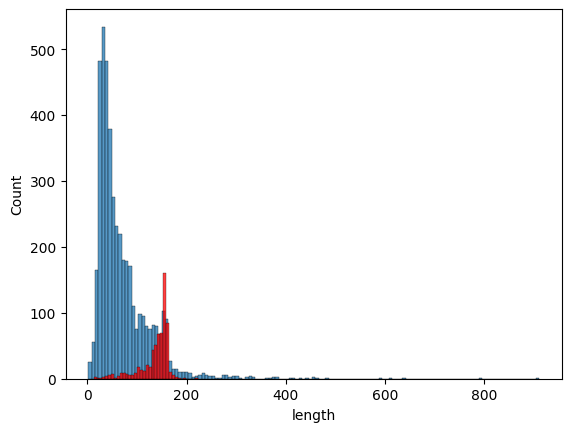

In [194]:
sns.histplot(df[df['target']==0]['length'])
sns.histplot(df[df['target']==1]['length'],color='red')


C:\Users\Harsh\AppData\Local\Temp\ipykernel_5128\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

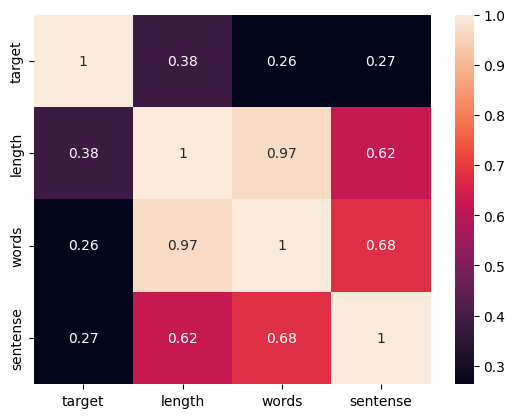

In [195]:
sns.heatmap(df.corr(),annot=True)

In [196]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [197]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [198]:
def lowercase(text):
    return text.lower()

# df['text'] = df['text'].apply(lowercase)

In [199]:
import re
def remove_tags(text):
    pattern = re.compile(r'<.*?>-')
    return pattern.sub(r'',text)

# df['text'] = df['text'].apply(remove_tags)

In [200]:
def remove_urls(text):
    pattern = re.compile(r'''https?://\S+|www.\.\S+https?:\/\/[^\s<>"]+|www\.[^\s<>"]+''')
    return pattern.sub(r'',text)

# df['text'] = df['text'].apply(remove_urls)

In [201]:
df['text'].sample(3)

1026                         Yes da. Any plm at ur office
5312    Here got ur favorite oyster... N got my favori...
4165    Well if I'm that desperate I'll just call arma...
Name: text, dtype: object

In [202]:
df['text'][2689]

'Ya ok, vikky vl c witin  &lt;#&gt; mins and il reply u..'

In [203]:
def remove_punc(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# df['text'] = df['text'].apply(remove_punc)

In [204]:
def remove_stopwords(text):
    new = []
    for word in text.split():
        if word in stopwords.words('english'):
            new.append('')
        else:
            new.append(word)
    x = new[:]
    new.clear()
    return " ".join(x)

# df['text'] = df['text'].apply(remove_stopwords)

In [205]:
def stem_word(text):
    return " ".join([PorterStemmer().stem(word) for word in text.split()])

# df['text'] = df['text'].apply(stem_word)

In [206]:
from emoji import demojize
# df['text'] = df['text'].apply(demojize)

In [207]:
df['transformed_text'] = df['text'].apply(transform_text)

In [208]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [209]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

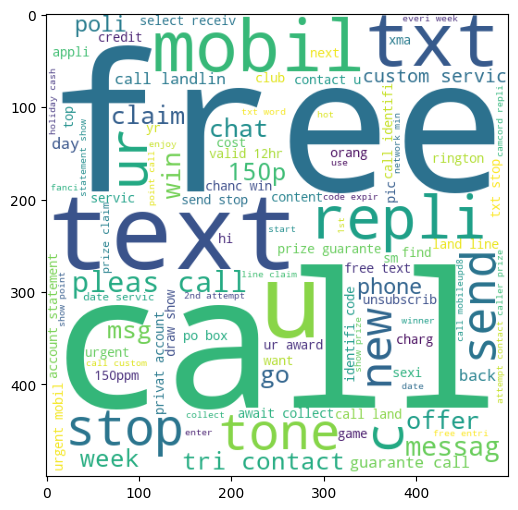

In [210]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [211]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)
        

9941

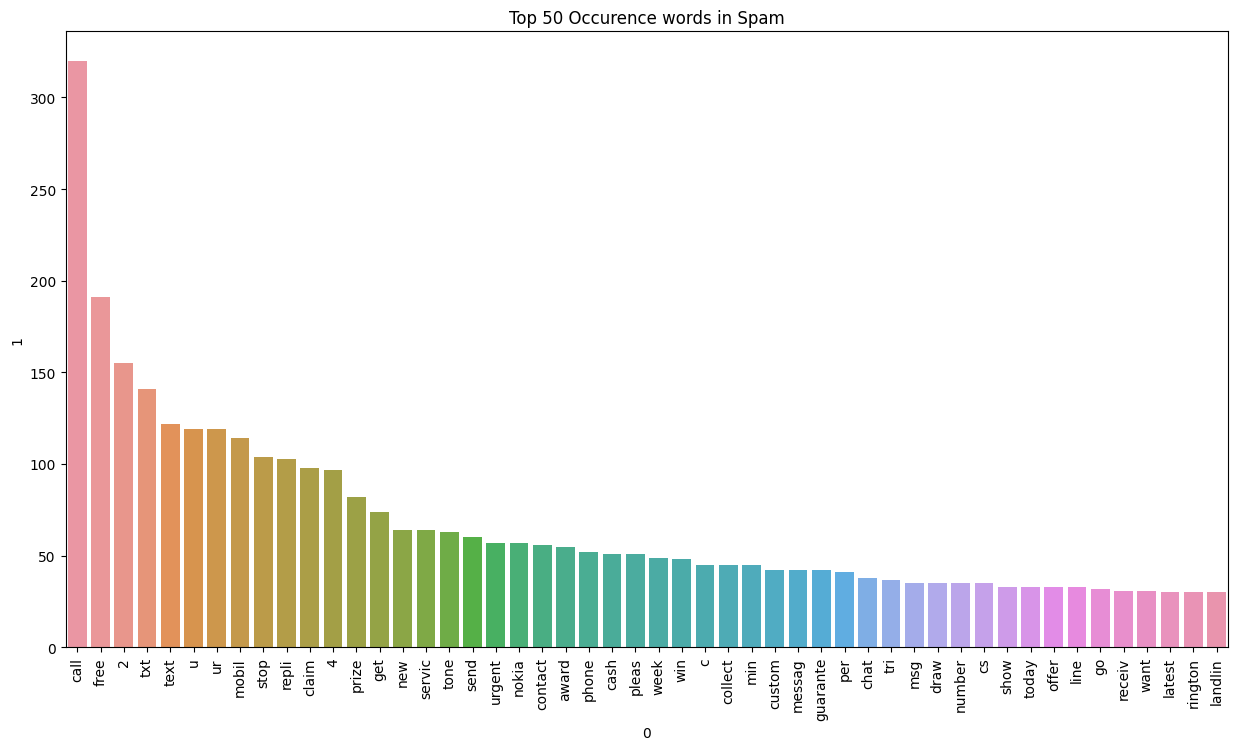

In [212]:
from collections import Counter

a = pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(15,8))
sns.barplot(x=a,y=b)
plt.xticks(rotation='vertical')
plt.title('Top 50 Occurence words in Spam')
plt.show()

In [213]:
not_spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

len(not_spam_corpus)
        

35305

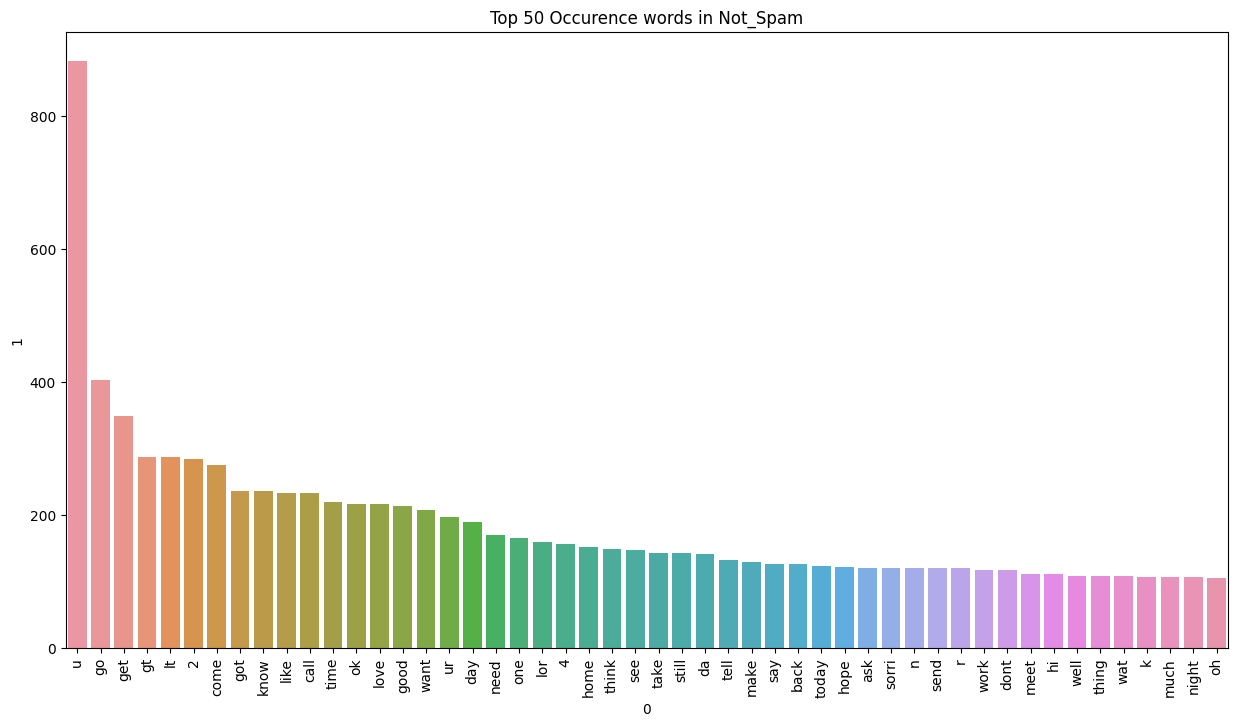

In [214]:
from collections import Counter

a = pd.DataFrame(Counter(not_spam_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(not_spam_corpus).most_common(50))[1]
plt.figure(figsize=(15,8))
sns.barplot(x=a,y=b)
plt.xticks(rotation='vertical')
plt.title('Top 50 Occurence words in Not_Spam')
plt.show()

In [215]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [216]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
# x = np.hstack((x,df['length'].values.reshape(-1,1)))
y = df['target'].values

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [218]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [219]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [220]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [221]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [222]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [242]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
bnb = BernoulliNB()
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [258]:
voting = VotingClassifier(estimators=[('rfc',rfc),('bnb', bnb),('mnb',mnb)],voting='soft')

In [259]:
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 1.0


In [237]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [238]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

<h2 style='color:DodgerBlue'><b>CHECKING Working of MODEL

In [239]:
input_sms = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [240]:
transformed_sms = transform_text(input_sms)
    
vector_input = tfidf.transform([transformed_sms])
    
result1 = model.predict(vector_input)[0]

In [241]:
result1

0

In [260]:
pickle.dump(voting,open('Voting_model.pkl','wb'))

In [261]:
Voting_model = pickle.load(open('Voting_model.pkl','rb'))

In [262]:
transformed_sms = transform_text(input_sms)
    
vector_input = tfidf.transform([transformed_sms])
    
result3 = Voting_model.predict(vector_input)[0]

In [263]:
result3

0

In [252]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2)

In [253]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9747899159663865


In [254]:
pickle.dump(rfc,open('rfc_model.pkl','wb'))

In [255]:
rfc_model = pickle.load(open('rfc_model.pkl','rb'))

In [256]:
transformed_sms = transform_text(input_sms)
    
vector_input = tfidf.transform([transformed_sms])
    
result2 = rfc_model.predict(vector_input)[0]

In [257]:
result2

0

In [264]:
result1, result2, result3

(0, 0, 0)